In [ ]:
## Step 3 — Baseline Re-anchor (ARIMA Reference)

# Data upload and high level review

import pandas as pd

data_raw = pd.read_csv("/home/surendran/rag_local/data/walmart Retail Data.csv")
print(data_raw.columns)


Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code'],
      dtype='object')


In [ ]:
# Data Review - Transactional 

import pandas as pd
data = pd.read_csv(
    "/home/surendran/rag_local/data/walmart Retail Data.csv",
    parse_dates=['Order Date'],   # convert to datetime
    index_col='Order Date'        # use it as time index
)

print(data.head())
print(data.info())



                  City  Customer Age      Customer Name Customer Segment  \
Order Date                                                                 
2012-01-01  McKeesport           NaN     Jessica Myrick   Small Business   
2012-01-01       Bowie           NaN     Matt Collister      Home Office   
2012-01-02        Napa           NaN  Alan Schoenberger        Corporate   
2012-01-02  Montebello           NaN  Elizabeth Moffitt         Consumer   
2012-01-02        Napa           NaN  Alan Schoenberger        Corporate   

            Discount  Number of Records  Order ID Order Priority  \
Order Date                                                         
2012-01-01      0.10                  1     28774           High   
2012-01-01      0.08                  1     13729  Not Specified   
2012-01-02      0.00                  1     37537            Low   
2012-01-02      0.08                  1     44069       Critical   
2012-01-02      0.07                  1     37537          

In [ ]:
# Data Review - Daily

# Group by Order Date and sum up Sales
daily_sales = data.groupby('Order Date')['Sales'].sum()

# Preview the result
print("\n📊 Daily aggregated sales:\n", daily_sales.head())

# Optional: check number of unique dates
print("\nTotal unique dates:", len(daily_sales))



📊 Daily aggregated sales:
 Order Date
2012-01-01     1052.8400
2012-01-02    11101.8700
2012-01-03    31997.8555
2012-01-04     1254.2500
2012-01-05    39734.4040
Name: Sales, dtype: float64

Total unique dates: 1418


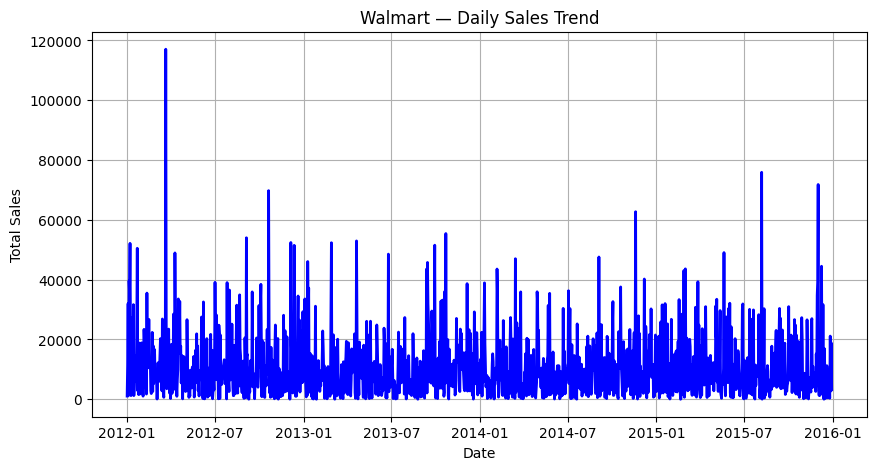

In [ ]:
# Trend analysis - Daily

import matplotlib.pyplot as plt

# --- Step 5: Plot daily sales trend ---
plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales.values, color='blue', linewidth=2)
plt.title("Walmart — Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()



📊 Monthly sales totals:
 Order Date
2012-01-31    516302.9595
2012-02-29    332480.6365
2012-03-31    411628.7290
2012-04-30    393276.4820
2012-05-31    230145.5380
Freq: ME, Name: Sales, dtype: float64


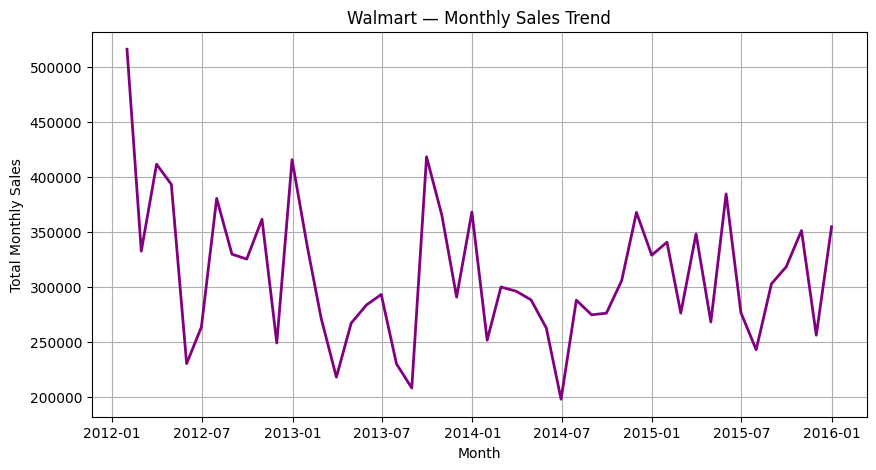

In [ ]:
# Data Review & Trend Analysis - monthly

monthly_sales = daily_sales.resample('ME').sum()

# Preview the result
print("\n📊 Monthly sales totals:\n", monthly_sales.head())

# Plot the monthly trend
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, color='purple', linewidth=2)
plt.title("Walmart — Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Monthly Sales")
plt.grid(True)
plt.show()


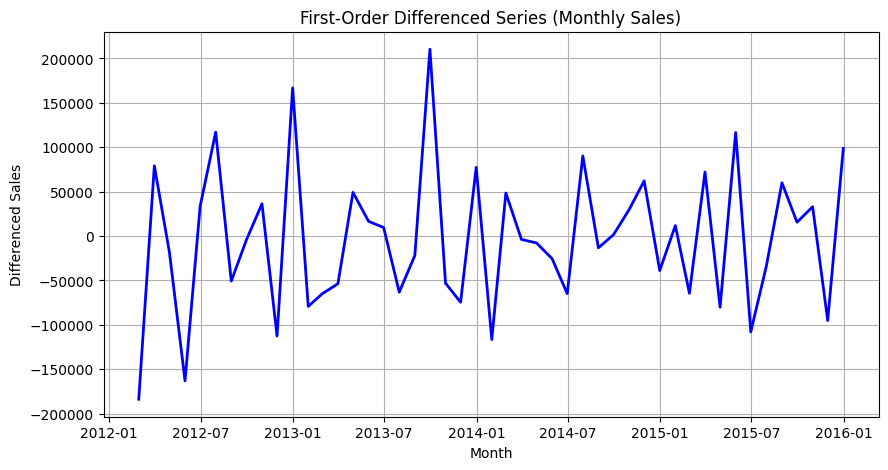

In [ ]:
# Glancing the differenced data - prework before ARIMA exploration

import matplotlib.pyplot as plt

# --- Take first difference to remove trend ---
diff_monthly = monthly_sales.diff().dropna()

# --- Plot the differenced series ---
plt.figure(figsize=(10,5))
plt.plot(diff_monthly, color='blue', linewidth=2)
plt.title("First-Order Differenced Series (Monthly Sales)")
plt.xlabel("Month")
plt.ylabel("Differenced Sales")
plt.grid(True)
plt.show()


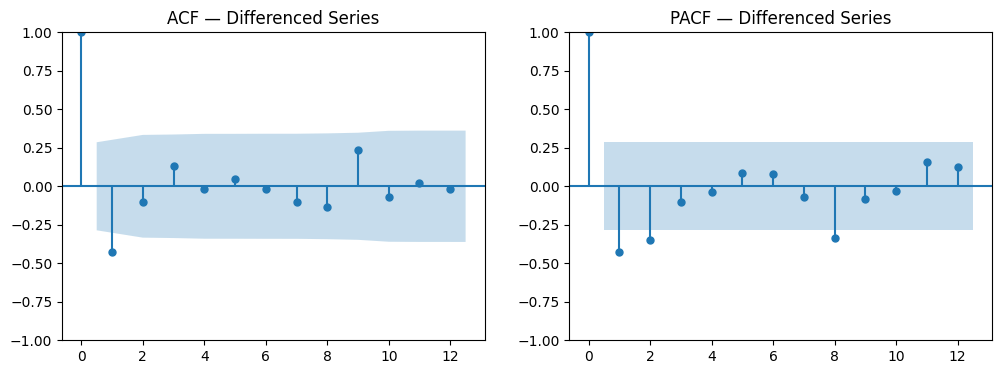

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -582.564
Date:                Wed, 07 Jan 2026   AIC                           1171.127
Time:                        00:42:37   BIC                           1176.678
Sample:                    01-31-2012   HQIC                          1173.216
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0981      0.155      0.632      0.528      -0.206       0.403
ma.L1         -0.9918      0.299     -3.318      0.001      -1.578      -0.406
sigma2      3.528e+09   8.26e-11   4.27e+19      0.0

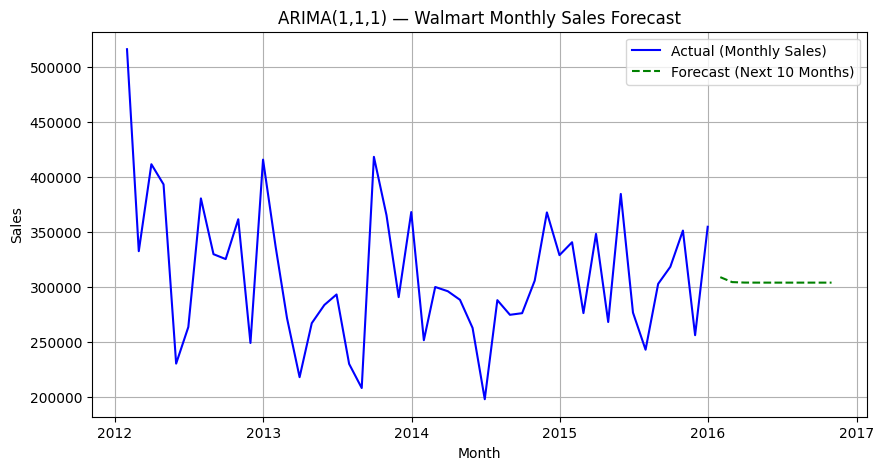

In [ ]:
# Trying out ARIMA Model

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- Step 1: (already done) create monthly sales ---
# monthly_sales = daily_sales.resample('M').sum()

# --- Step 2: First differencing ---
diff_monthly = monthly_sales.diff().dropna()

# --- Step 3: Check ACF and PACF (to estimate p and q) ---
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(diff_monthly, lags=12, ax=axes[0])
plot_pacf(diff_monthly, lags=12, ax=axes[1])
axes[0].set_title("ACF — Differenced Series")
axes[1].set_title("PACF — Differenced Series")
plt.show()

# --- Step 4: Fit ARIMA model ---
# Example ARIMA(1,1,1) — 1 AR term, 1 difference, 1 MA term
model = ARIMA(monthly_sales, order=(1,1,1))
results = model.fit()

# --- Step 5: Model summary ---
print(results.summary())

# --- Step 6: Forecast next 10 months ---
forecast = results.forecast(steps=10)

# --- Step 7: Plot actual vs forecast ---
plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label='Actual (Monthly Sales)', color='blue')
plt.plot(forecast.index, forecast, label='Forecast (Next 10 Months)', color='green', linestyle='--')
plt.title("ARIMA(1,1,1) — Walmart Monthly Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


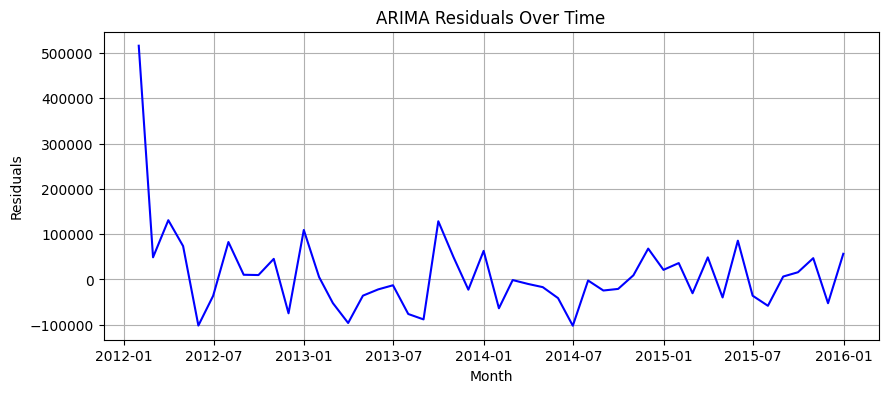

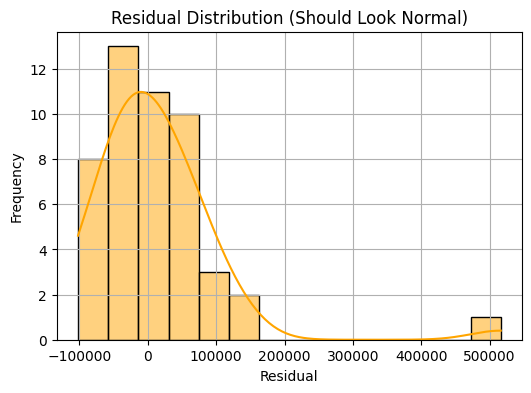

count        48.000000
mean      11529.211383
std       94964.174044
min     -102119.529718
25%      -36943.682766
50%       -1750.238623
75%       48863.148597
max      516302.959500
dtype: float64


In [ ]:
# Residual plot : ARIMA

import matplotlib.pyplot as plt
import seaborn as sns

# --- Get residuals ---
residuals = results.resid

# --- Plot residuals over time ---
plt.figure(figsize=(10,4))
plt.plot(residuals, color='blue')
plt.title("ARIMA Residuals Over Time")
plt.xlabel("Month")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# --- Plot residual distribution ---
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Residual Distribution (Should Look Normal)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# --- Optional: check summary statistics ---
print(residuals.describe())
